In [55]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [56]:
iris=sns.load_dataset('iris')
iris=load_iris()
iris
X=pd.DataFrame(iris.data)
y=iris.target
classification=DecisionTreeClassifier()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [58]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}
model=GridSearchCV( classification, parameter , cv=5 , scoring='accuracy')
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [64]:
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'random'}


In [60]:
model_pred=model.predict(X_train)
model_pred

array([1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       2, 0])

In [61]:
accuracy=accuracy_score(model_pred, y_train)
accuracy

0.9333333333333333

In [62]:
report=classification_report(model_pred, y_train)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.82      0.90        33
           2       0.83      1.00      0.91        24

    accuracy                           0.93        90
   macro avg       0.93      0.94      0.93        90
weighted avg       0.94      0.93      0.93        90



[Text(0.5454545454545454, 0.9, 'x[1] <= 2.7\ngini = 0.663\nsamples = 90\nvalue = [34.0, 27.0, 29.0]'),
 Text(0.36363636363636365, 0.7, 'x[3] <= 1.553\ngini = 0.475\nsamples = 18\nvalue = [1, 12, 5]'),
 Text(0.45454545454545453, 0.8, 'True  '),
 Text(0.2727272727272727, 0.5, 'x[3] <= 1.281\ngini = 0.142\nsamples = 13\nvalue = [1, 12, 0]'),
 Text(0.18181818181818182, 0.3, 'x[0] <= 5.135\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.45454545454545453, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.7272727272727273, 0.7, 'x[2] <= 1.931\ngini = 0.635\nsamples = 72\nvalue = [33, 15, 24]'),
 Text(0.6363636363636364, 0.8, '  False'),
 Text(0.6363636363636364, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.8181818181818182

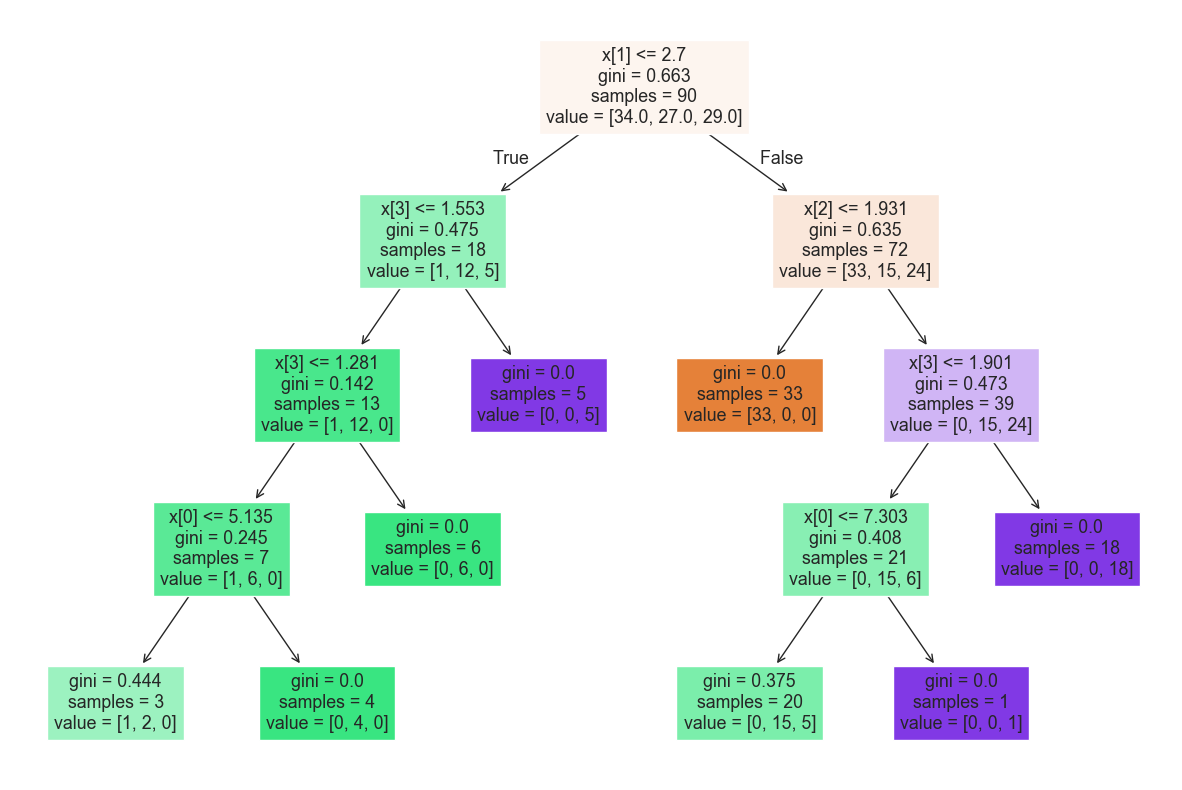

In [66]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model.best_estimator_, filled=True)
